In [12]:
import pandas as pd
from datetime import datetime
df_columns = [ "DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4","ISO3"]
# Source: https://sites.google.com/view/snuaric/data/covid-19-data/covid-19-data?authuser=0
# ISO3 is a country variable

# https://www.worldometers.info/world-population/india-population/
german_population=84299671 # Tuesday, June 7, 2022

#MVAR1= Cum Confirmed cases
#MVAR2= Cum Deaths Cases
#MVAR3= Cum Recovered Cases
#MVAR4= Quarantined Cases

df = pd.read_csv("covid_de_world.csv", header=0, usecols=df_columns)

df2 = df[df["ISO3"] == "DEU"]
def parse(x):
	return datetime.strptime(x, '%d%b%y')

df2["DATE"] = df2["DATE"].apply(parse)
# target is AVAR1 which is newly confirmed cases
df_new = df.set_index('DATE')
df2=df2.sort_values(by=['DATE'], ascending=True)
# # sk = df["Country"] == "Republic of Korea"
df2 = df2[23:-2]

df2.tail(10)
# df2.head(10)
# check if there are any missing dates for which data is not recorded. If so, then print them
df_new = df2.set_index('DATE')
pd.date_range(start = '2020-01-23', end = '2022-05-15' ).difference(df_new.index)


import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

neg_escape=200+100
data_len=df2.shape[0]-neg_escape
print("data_length:", data_len)

new_df=df2.iloc[0:173*3+15,1:]
dates=new_df["DATE"].tolist()

#Cummulative numbers
infected_cum=df2[['MVAR1']][0:173*3+16].to_numpy()
quarantined_cum=df2[['MVAR4']][0:173*3+16].to_numpy()
deceased_cum=df2[['MVAR2']][0:173*3+16].to_numpy()
recovered_cum=df2[['MVAR3']][0:173*3+16].to_numpy()


#Daily numbers
infected=infected_cum[1:len(infected_cum)]-infected_cum[0:len(infected_cum)-1]
quarantined=quarantined_cum[0:len(infected_cum)-1]
deceased=deceased_cum[1:len(deceased_cum)]-deceased_cum[0:len(deceased_cum)-1]
recovered=recovered_cum[1:len(recovered_cum)]-recovered_cum[0:len(recovered_cum)-1]


oner=np.ones((len(infected),1))
residual=infected+quarantined+deceased+recovered
susceptible=german_population*oner-residual



# Add histogram data
S=np.squeeze(susceptible).astype(float)
I=np.squeeze(infected).astype(float)
Q=np.squeeze(quarantined).astype(float)
R=np.squeeze(recovered).astype(float)
D=np.squeeze(deceased).astype(float)



df = pd.DataFrame({'DATE': dates, 'Susceptible': S, 'Infected': I, 'Quarantined': Q, 'Recovered': R, 'Deceased': D})
df['day'] = df['DATE'].map(lambda x: x.day)
df['month'] = df['DATE'].map(lambda x: x.month)
df['year'] = df['DATE'].map(lambda x: x.year)
df['days'] = df.index.tolist()

for i in range(len(df)):
    if df['year'][i]==2021 and df['year'][i-1]==2020:
        take_note=df['days'][i]
    if df['year'][i]==2021:
        df['days'][i]=df['days'][i]-take_note

    if df['year'][i]==2022 and df['year'][i-1]==2021:
        take_note2=df['days'][i]
    if df['year'][i]==2022:
        df['days'][i]=df['days'][i]-take_note2
    







data_length: 544


C:\Users\junaid\AppData\Local\Temp/ipykernel_10516/988683558.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["DATE"] = df2["DATE"].apply(parse)
C:\Users\junaid\AppData\Local\Temp/ipykernel_10516/988683558.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days'][i]=df['days'][i]-take_note


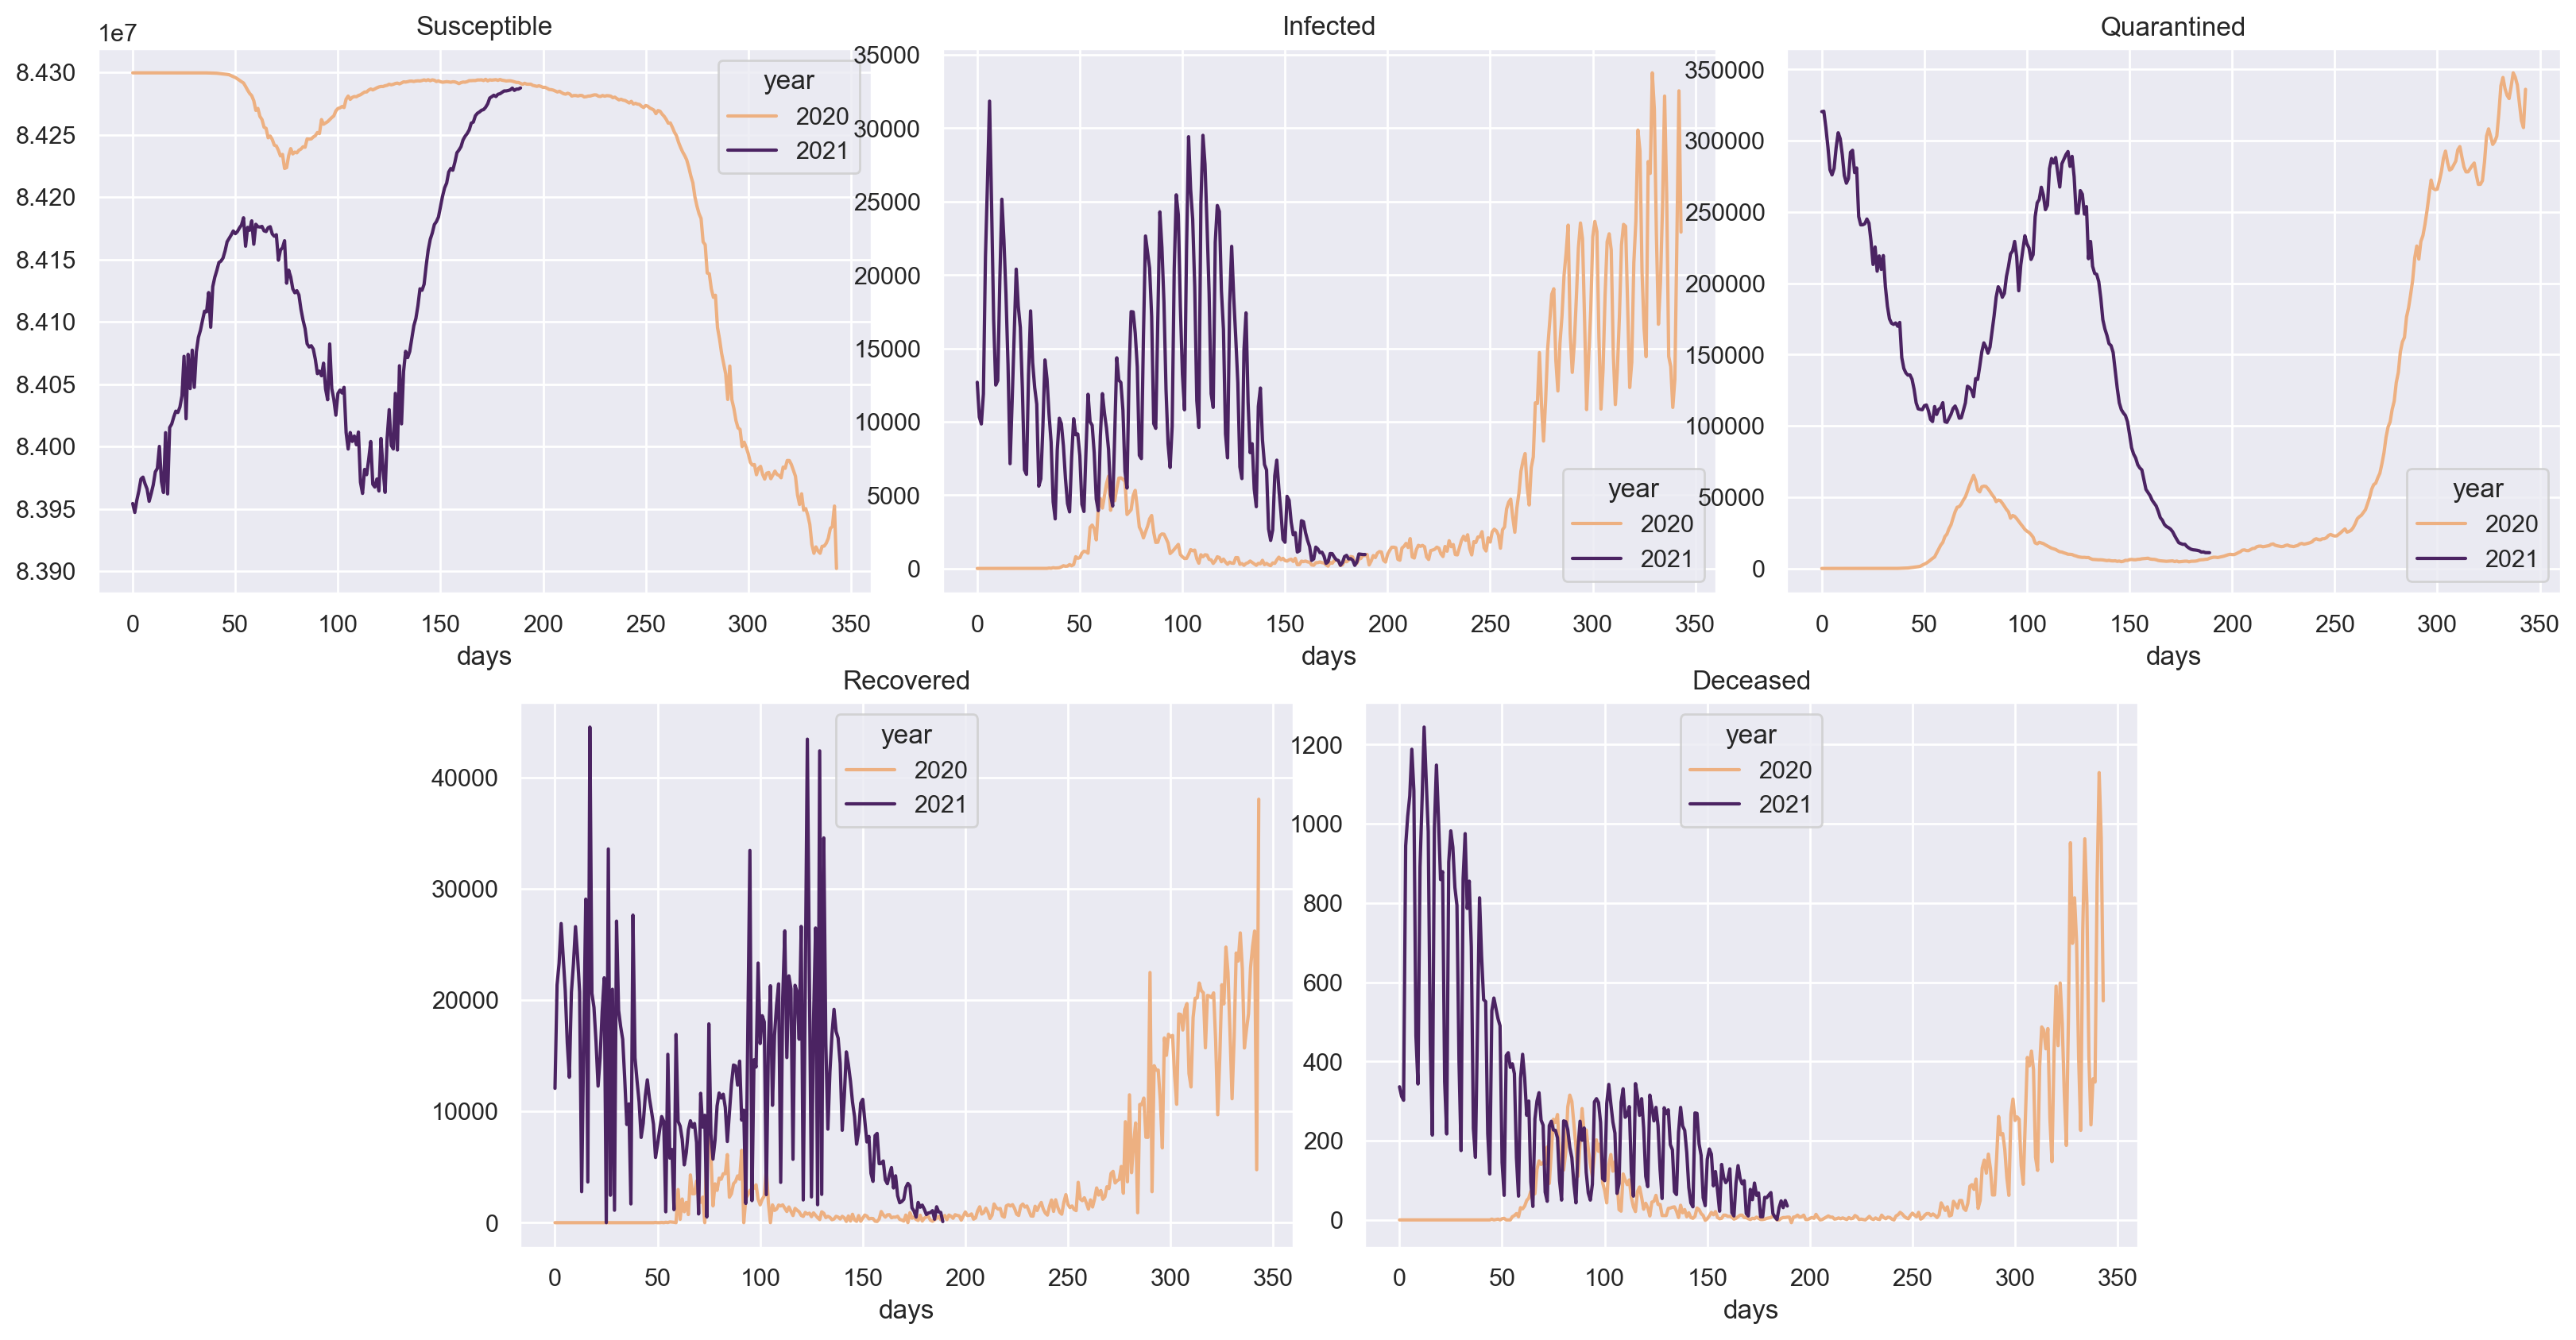

In [17]:
from matplotlib import pyplot
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

pyplot.figure(figsize=(20, 10),dpi=200) # width and height in inches
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

g1=sns.lineplot(data=df, x="days", y="Susceptible", hue="year",palette="flare", ax=ax1)
# g1.set(xticklabels=[])
# g1.set(title='User-Type (0=Non-Subscriber, 1=Subscriber)')
g1.set(ylabel=None)
g1.set(title="Susceptible")
g2=sns.lineplot(data=df, x="days", y="Infected", hue="year",palette="flare", ax=ax2)
g2.set(ylabel=None)
g2.set(title="Infected")
g3=sns.lineplot(data=df, x="days", y="Quarantined", hue="year",palette="flare", ax=ax3)
g3.set(ylabel=None)
g3.set(title="Quarantined")
g4=sns.lineplot(data=df, x="days", y="Recovered", hue="year",palette="flare", ax=ax4)
g4.set(ylabel=None)
g4.set(title="Recovered")
g5=sns.lineplot(data=df, x="days", y="Deceased", hue="year",palette="flare", ax=ax5)
g5.set(ylabel=None)
g5.set(title="Deceased")
plt.show()